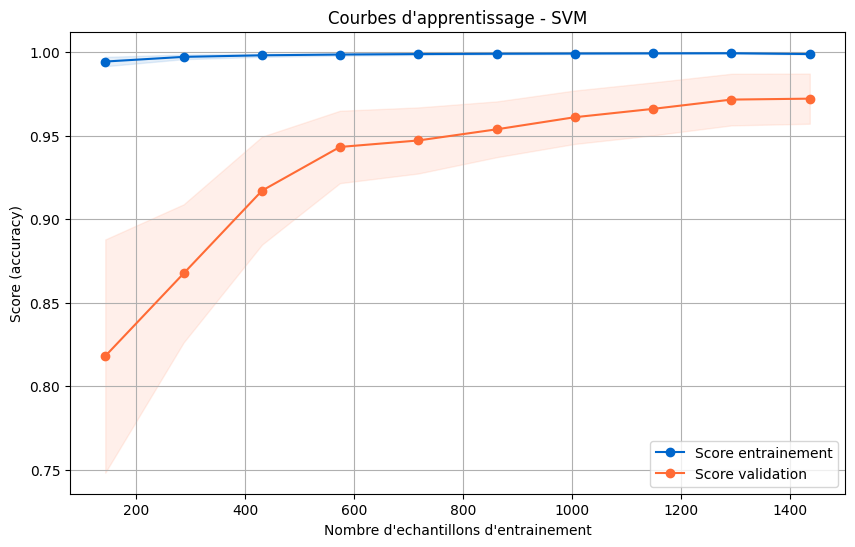

In [1]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)
model = SVC(kernel='rbf', gamma=0.001)

# Calculer les courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(
    model, X, y,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1
)

# Calculer les moyennes et ecarts-types
train_mean = train_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
test_mean = test_scores.mean(axis=1)
test_std = test_scores.std(axis=1)

# Tracer
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', label='Score entrainement', color='#0066cc')
plt.plot(train_sizes, test_mean, 'o-', label='Score validation', color='#ff6b35')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='#0066cc')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='#ff6b35')
plt.xlabel("Nombre d'echantillons d'entrainement")
plt.ylabel('Score (accuracy)')
plt.title("Courbes d'apprentissage - SVM")
plt.legend(loc='best')
plt.grid(True)
plt.show()

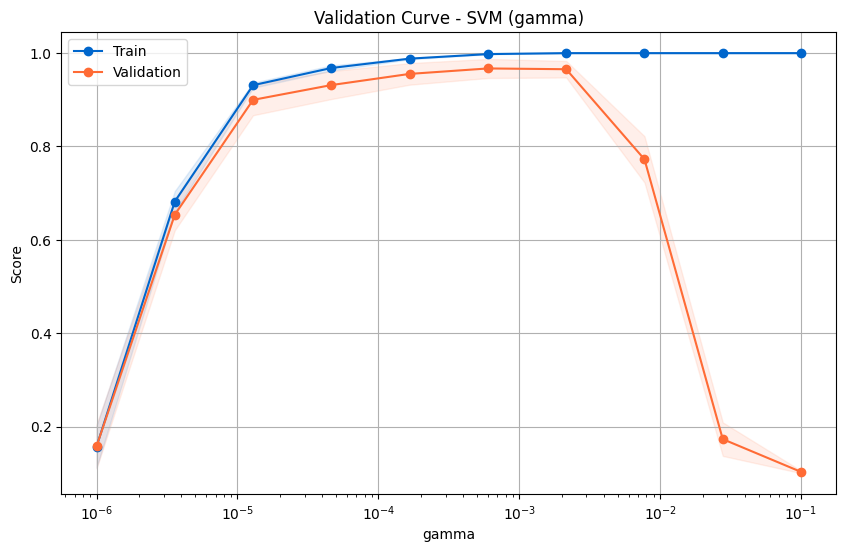

In [2]:
from sklearn.model_selection import validation_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.datasets import load_digits

X, y = load_digits(return_X_y=True)

# Faire varier gamma
param_range = np.logspace(-6, -1, 10)

train_scores, test_scores = validation_curve(
    SVC(kernel='rbf'), X, y,
    param_name='gamma',
    param_range=param_range,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)

plt.figure(figsize=(10, 6))
plt.semilogx(param_range, train_scores.mean(axis=1), 'o-', label='Train', color='#0066cc')
plt.semilogx(param_range, test_scores.mean(axis=1), 'o-', label='Validation', color='#ff6b35')
plt.fill_between(param_range, train_scores.mean(axis=1) - train_scores.std(axis=1),
    train_scores.mean(axis=1) + train_scores.std(axis=1), alpha=0.1, color='#0066cc')
plt.fill_between(param_range, test_scores.mean(axis=1) - test_scores.std(axis=1),
    test_scores.mean(axis=1) + test_scores.std(axis=1), alpha=0.1, color='#ff6b35')
plt.xlabel('gamma')
plt.ylabel('Score')
plt.title('Validation Curve - SVM (gamma)')
plt.legend()
plt.grid(True)
plt.show()